In [2]:
# 필요한 라이브러리 임포트&설치
# !pip install dbfread
# !pip install haversine
# !pip install sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine
from tqdm.notebook import tqdm
%matplotlib inline
import platform
import pickle
import re
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
def pklopen(route):
    with open('{}'.format(route), 'rb') as f:
        df = pickle.load(f)
    return df
def pklsave(df, name):
    with open('{}.pkl'.format(name), 'wb') as f:
        pickle.dump(df, f)

##### 자녀연령별 취업여성 출처: 2018 한국의 워킹맘 보고서 https://www.kbfg.com/kbresearch/report/reportView.do?reportId=1003701
##### 행정동별 거주인구: 서울 빅데이터캠퍼스

In [47]:
working_dic = {'6세 이하':[44.8], '7-12세':[59.8], '13-17세':[67.3]}
working_df = pd.DataFrame(working_dic, index = ['자녀 연령별 여성 고용률(2017년)'])
working_df

,6세 이하,7-12세,13-17세
자녀 연령별 여성 고용률(2017년),44.8,59.8,67.3


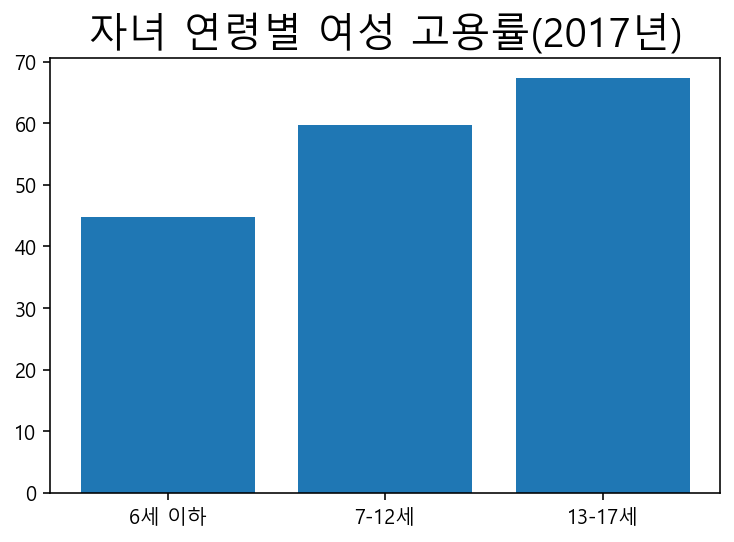

In [48]:
plt.bar(working_df.columns, working_df.iloc[0])
plt.title(label=working_df.index[0], fontdict={'fontsize':20})
plt.show()

In [43]:
df['맞벌이 가정 비율'] = 0
for i in range(df.shape[0]):
    (df.xxx.iloc[i] * working_df['7-12세'][0]/100)/df 

598.0

In [49]:
both_rate = pd.read_excel('./data/맞벌이 가구비율.xls')
both_rate2 = pd.read_excel('./data/자녀연령별 맞벌이 가구 현황.xls')
both_rate = both_rate.rename(columns=both_rate.iloc[0]).drop(both_rate.index[0])
df.reset_index(inplace=True)
df_need = df.rename(columns=df.iloc[0]).drop(df.index[0])

In [ ]:
# 인덱스로 특정 행 잡아줄 때 
def prep(name):
    df = pd.read_csv(r'./{}'.format(name), encoding = 'cp949')
    df.reset_index(inplace=True)
    df_need = df.rename(columns=df.iloc[0]).drop(df.index[0])
    return df_need

In [50]:
both_rate

,통계표명:,맞벌이가구 비율,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,단위:,천가구. %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2011,NaN,NaN,2012,NaN,NaN,2013,NaN,NaN,...,NaN,2016,NaN,NaN,2017,NaN,NaN,2018,NaN,NaN
2,NaN,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율,...,비율,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율,유배우가구,맞벌이가구,비율
3,전체,"11,761","5,241",44.6,"11,822","5,201",44.0,"11,940","5,175",43.3,...,44.1,"12,190","5,545",45.5,"12,224","5,456",44.6,"12,245","5,675",46.3
4,15~29세,259,101,39.0,240,97,40.3,217,82,37.7,...,36.8,186,72,38.6,179,66,36.8,175,68,38.6
5,30~39세,"2,356",976,41.4,"2,300",959,41.7,"2,227",924,41.5,...,43.5,"2,081",950,45.7,"2,015",954,47.3,"1,939",968,49.9
6,40~49세,"3,471","1,822",52.5,"3,430","1,788",52.1,"3,369","1,704",50.6,...,51.2,"3,235","1,705",52.7,"3,175","1,655",52.1,"3,104","1,683",54.2
7,50~64세,"3,970","1,844",47.5,"4,071","1,909",46.9,"4,231","1,968",46.5,...,48.2,"4,539","2,262",49.8,"4,604","2,240",48.7,"4,677","2,360",50.5
8,65세 이상,"1,706",459,26.9,"1,781",449,25.2,"1,896",497,26.2,...,25.4,"2,149",556,25.9,"2,251",542,24.1,"2,350",596,25.4
9,출처:,통계청 「지역별고용조사」,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
both_rate2

,통계표명:,자녀연령별 맞벌이 가구 현황,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,단위:,"천가구, %",NaN,NaN,NaN,NaN
1,NaN,NaN,전체(0~17세),6세 이하,7~12세,13~17세
2,2015,유배우 가구,"4,761","2,134","1,330","1,297"
3,NaN,맞벌이 가구,"2,246",813,684,748
4,NaN,비율,47.2,38.1,51.5,57.7
5,2016,유배우 가구,"4,665","2,090","1,308","1,267"
6,NaN,맞벌이 가구,"2,258",827,690,741
7,NaN,비율,48.4,39.6,52.7,58.5
8,2017,유배우 가구,"4,537","2,062","1,285","1,190"
9,NaN,맞벌이 가구,"2,207",857,659,691
